In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### The most time consuming and irksome task in data science is commonly thought to be data preparation. Luckily, pandas helps us with that (at least for tabular data)

#### Series

In [2]:
cars = pd.Series(["BMW", "Toyata", "Honda"])

In [4]:
cars

0       BMW
1    Toyata
2     Honda
dtype: object

In [5]:
type(cars)

pandas.core.series.Series

In [23]:
car_colors = pd.Series(["Red", "Blue", "Green"])

#### Many series make up a dataframe!

In [10]:
car1 = ["BMW", "red"]
car2 = ["Honda", "blue"]

In [13]:
df = pd.DataFrame([car1, car2], columns=["Car brand", "Car color"])

In [14]:
df

,Car brand,Car color
0,BMW,red
1,Honda,blue


In [34]:
cars

0       BMW
1    Toyata
2     Honda
dtype: object

In [35]:
car_colors

0      Red
1     Blue
2    Green
dtype: object

In [48]:
df = pd.DataFrame({"Car brands": cars, "Car colors": car_colors})

In [49]:
df

,Car brands,Car colors
0,BMW,Red
1,Toyata,Blue
2,Honda,Green


In [27]:
df.iloc[0] # dataframe index location

Car brands    BMW
Car colors    Red
Name: 0, dtype: object

In [29]:
df["Car colors"]

0      Red
1     Blue
2    Green
Name: Car colors, dtype: object

In [51]:
df.index = ["car1", "car2", "car3"]

In [53]:
df

,Car brands,Car colors
car1,BMW,Red
car2,Toyata,Blue
car3,Honda,Green


In [55]:
df.loc["car2"] # dataframe index name

Car brands    Toyata
Car colors      Blue
Name: car2, dtype: object

In [56]:
car_sales = pd.read_csv("car-sales.csv")

In [57]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [58]:
car_sales.to_csv("exported_car_sales.csv")

#### Describing a dataframe
##### Exploratory data analysis(EDA)

In [59]:
# data type

In [60]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [64]:
test_df = pd.DataFrame({"col1": [123, 123]})

In [65]:
test_df

,col1
0,123
1,123


In [70]:
test_df.dtypes

col1    uint8
dtype: object

In [69]:
test_df = test_df.astype("uint8")

In [75]:
car_sales.columns.to_numpy()

array(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype=object)

In [76]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [77]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [78]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [82]:
car_sales.mean(numeric_only=True)[0]

78601.4

In [84]:
np.mean(car_sales["Odometer (KM)"].values)

78601.4

In [87]:
car_sales["Odometer (KM)"].mean()

78601.4

In [107]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [89]:
car_sales[car_sales["Odometer (KM)"] < 100000]

,Make,Colour,Odometer (KM),Doors,Price
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [90]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [93]:
car_sales.Doors.value_counts()

4    8
3    1
5    1
Name: Doors, dtype: int64

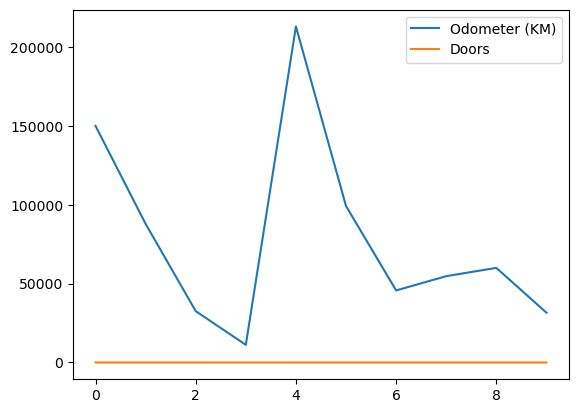

In [97]:
car_sales.plot();

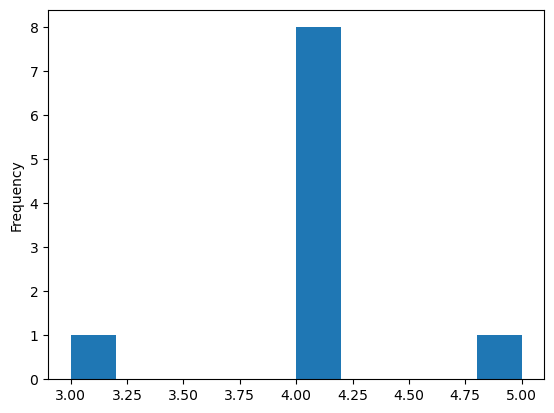

In [103]:
car_sales["Doors"].plot.hist();

In [ ]:
car_sales["Price"].plot.hist()

TypeError: no numeric data to plot

#### Changing price type to float

In [109]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [114]:
sample = car_sales.iloc[0].Price

In [115]:
sample

'$4,000.00'

##### Regular expressions

In [134]:
import re
int(re.sub(r"[$,.]", "", sample))

400000

In [141]:
car_sales["Price"]  = car_sales["Price"].apply(lambda x: int(re.sub(r"[$,.]", "", x)))

In [145]:
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000


In [143]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


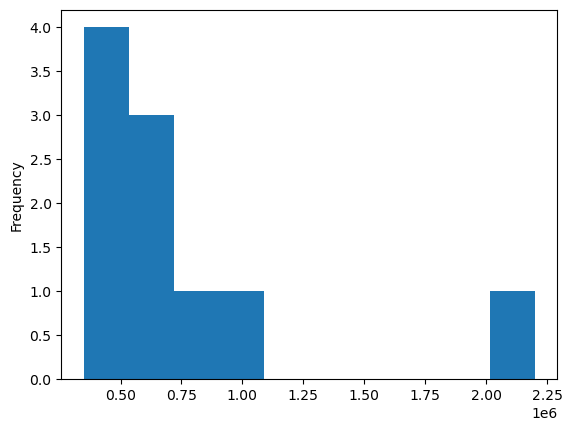

In [147]:
car_sales["Price"].plot.hist()

####　Missing data

In [148]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")

In [149]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [152]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      9 non-null      object 
 1   Colour    9 non-null      object 
 2   Odometer  6 non-null      float64
 3   Doors     9 non-null      float64
 4   Price     8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


In [175]:
car_sales_missing.Price

0     $4,000
1     $5,000
2     $7,000
3    $22,000
4     $3,500
5     $4,500
6     $7,500
7        NaN
8        NaN
9     $9,700
Name: Price, dtype: object

In [153]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [156]:
car_sales_missing["Make"].fillna("Toyota", inplace=True)

In [157]:
car_sales_missing.isna().sum()

Make        0
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [159]:
car_sales_missing["Colour"].fillna("White", inplace=True)

In [162]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [181]:
type(car_sales_missing.iloc[9].Price)

str

In [194]:
price_numerical = car_sales_missing[car_sales_missing.Price.notnull()]

In [195]:
price_numerical

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,White,92302.666667,4.0,"$7,500"
9,Toyota,White,31600.000000,4.0,"$9,700"


In [196]:
mean_price = price_numerical["Price"].apply(lambda x: int(re.sub(r"[$,.]", "", x))).mean()

In [197]:
mean_price

7900.0

In [198]:
car_sales_missing.Odometer.fillna(car_sales_missing.Odometer.mean(), inplace=True)
car_sales_missing.Doors.fillna(car_sales_missing.Doors.median(), inplace=True)
car_sales_missing.Price.fillna("$7,900", inplace=True)

In [200]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [203]:
# shuffle dataframe
shuffled = car_sales_missing.sample(frac=1)

In [ ]:
shuffled